Notes by: **Noman Iqbal** => **thenomaniqbal@gmail.com** 

# Support Vector Machines (SVM)

SVM stands for support vector machine. SVM's are typically used for classification tasks. They work very well for high dimensional data and are allowed for us to classify data that does not have a linear correspondence. For example classifying a data set like the one below.

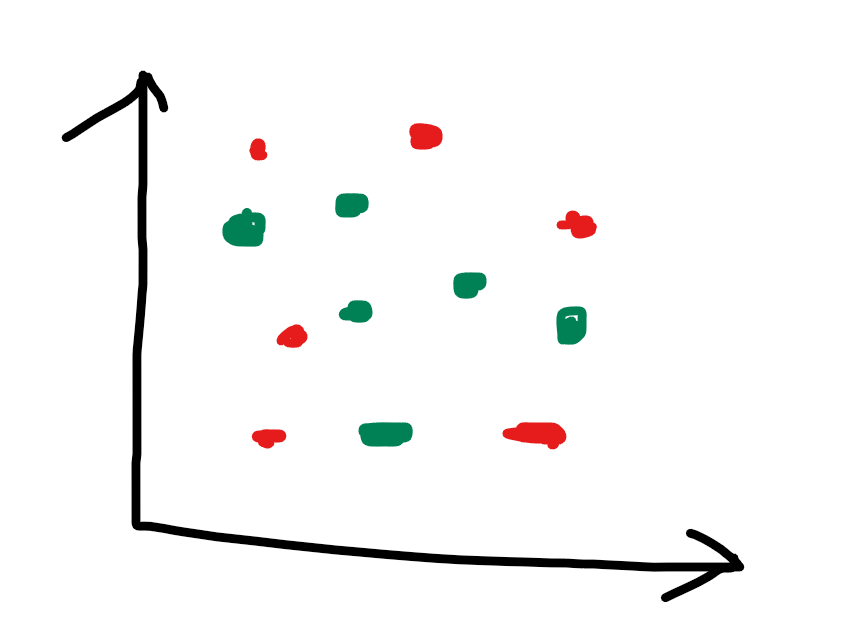

If we use K Nearest Neighbors to classify this data set, it would likely give us a very low accuracy score and is not favorable. This is where SVM's are useful.   

## Importing Modules  

Before we start we need to import a few things from sklearn.

In [1]:
import sklearn
from sklearn import svm
from sklearn import datasets

For this lesson we will be using a breast cancer data set. It consists of many features describing a tumor and classifies them as either cancerous or non cancerous.

To load our data we will simply do the following.

In [2]:
cancer = datasets.load_breast_cancer()
# To see a list of the features in the data set we can do:
print("Features: ", cancer.feature_names)

# Similarly for the labels.
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


## Splitting Data  
Now that we have loaded in our data set it is time to split it into training and testing data.

In [3]:
X = cancer.data  # All of the features
y = cancer.target  # All of the labels

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)
# If we want to have a look at our data we can print the first few instances.

print(X_train[:5], y_train[:5])

[[1.522e+01 3.062e+01 1.034e+02 7.169e+02 1.048e-01 2.087e-01 2.550e-01
  9.429e-02 2.128e-01 7.152e-02 2.602e-01 1.205e+00 2.362e+00 2.265e+01
  4.625e-03 4.844e-02 7.359e-02 1.608e-02 2.137e-02 6.142e-03 1.752e+01
  4.279e+01 1.287e+02 9.150e+02 1.417e-01 7.917e-01 1.170e+00 2.356e-01
  4.089e-01 1.409e-01]
 [1.442e+01 1.977e+01 9.448e+01 6.425e+02 9.752e-02 1.141e-01 9.388e-02
  5.839e-02 1.879e-01 6.390e-02 2.895e-01 1.851e+00 2.376e+00 2.685e+01
  8.005e-03 2.895e-02 3.321e-02 1.424e-02 1.462e-02 4.452e-03 1.633e+01
  3.086e+01 1.095e+02 8.264e+02 1.431e-01 3.026e-01 3.194e-01 1.565e-01
  2.718e-01 9.353e-02]
 [1.480e+01 1.766e+01 9.588e+01 6.748e+02 9.179e-02 8.890e-02 4.069e-02
  2.260e-02 1.893e-01 5.886e-02 2.204e-01 6.221e-01 1.482e+00 1.975e+01
  4.796e-03 1.171e-02 1.758e-02 6.897e-03 2.254e-02 1.971e-03 1.643e+01
  2.274e+01 1.059e+02 8.295e+02 1.226e-01 1.881e-01 2.060e-01 8.308e-02
  3.600e-01 7.285e-02]
 [1.278e+01 1.649e+01 8.137e+01 5.025e+02 9.831e-02 5.234e-02 3.653

**What a SVM Does?**  

A SVM has a large list of applicable uses. However, in machine learning it is typically used for classification. It is a powerful tool that is a good choice for classifying complicated data with a high degree of dimensions(features). Note that K-Nearest Neighbors does not perform well on high-dimensional data.  

**How A Support Vector Machine Works**  

In short a support vector machine works by dividing data into multiple classes using something called a hyper-plane.  
A hyper plane is a fancy word for something that is straight that can divide data points. In 2D space a hyper-plane is simply a line, in 3D space a hyper-plane is a plane. In any space higher than 3D it is simply called a hyper-plane.  
Here’s an example of a hyper-plane for the data points on the 2D graph below.  

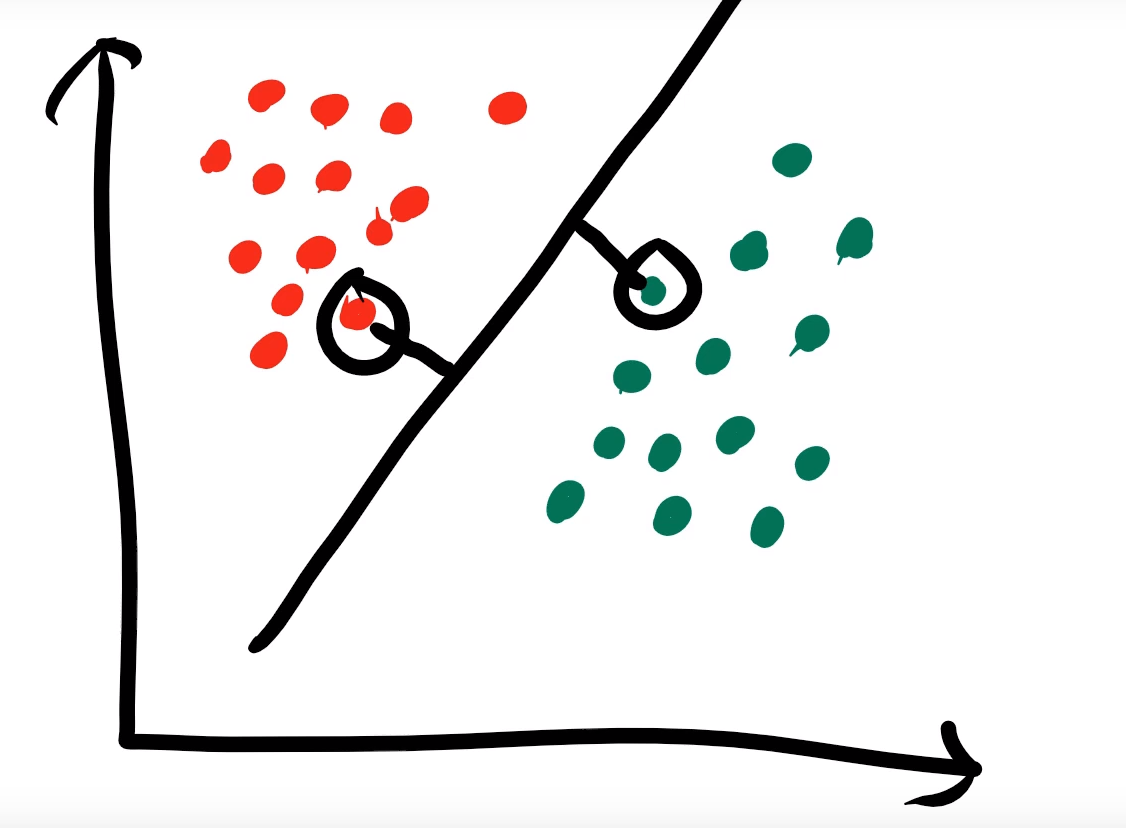

# Hyper-Planes   

When we create a hyper-plane we need to do the following. We must pick two points that are known as our support vectors. These points must be the two closest points to the hyper-plane and their distance from the hyper-plane must be identical. In the example above we can see that the two circled points are our support vectors and their distance to the hyper-plane is the same, they are also the closest points. With this rule we can actually create an infinite amount of hyper planes (see below).

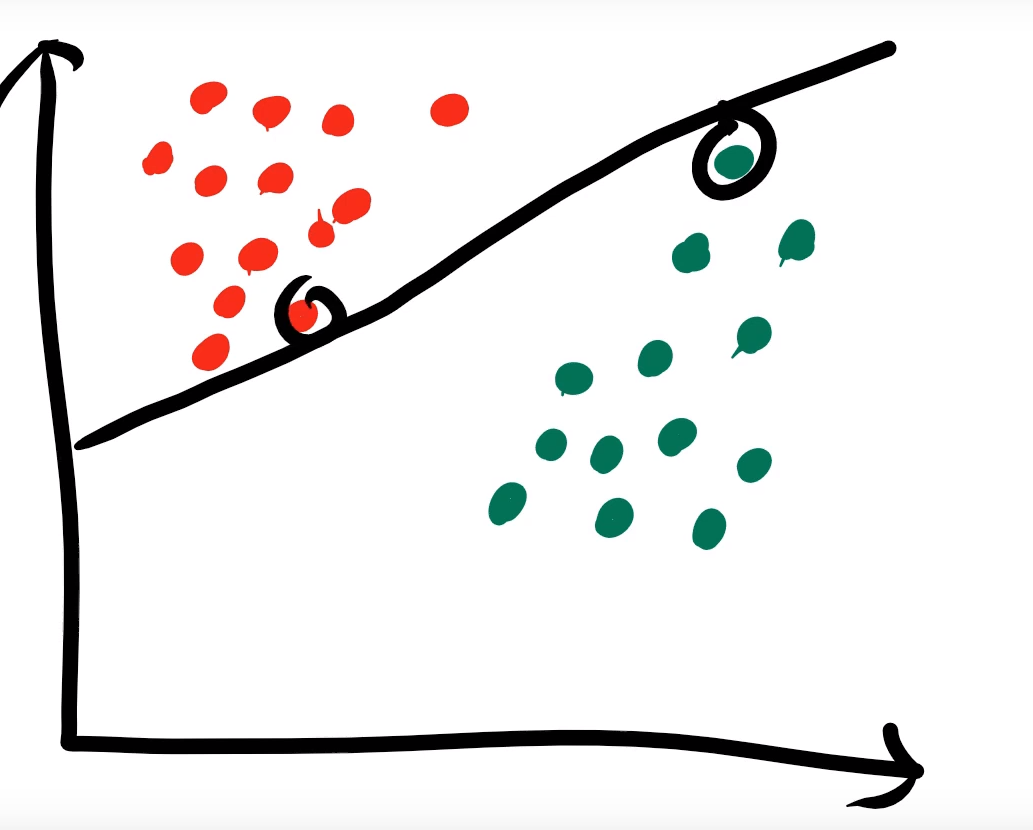

or this

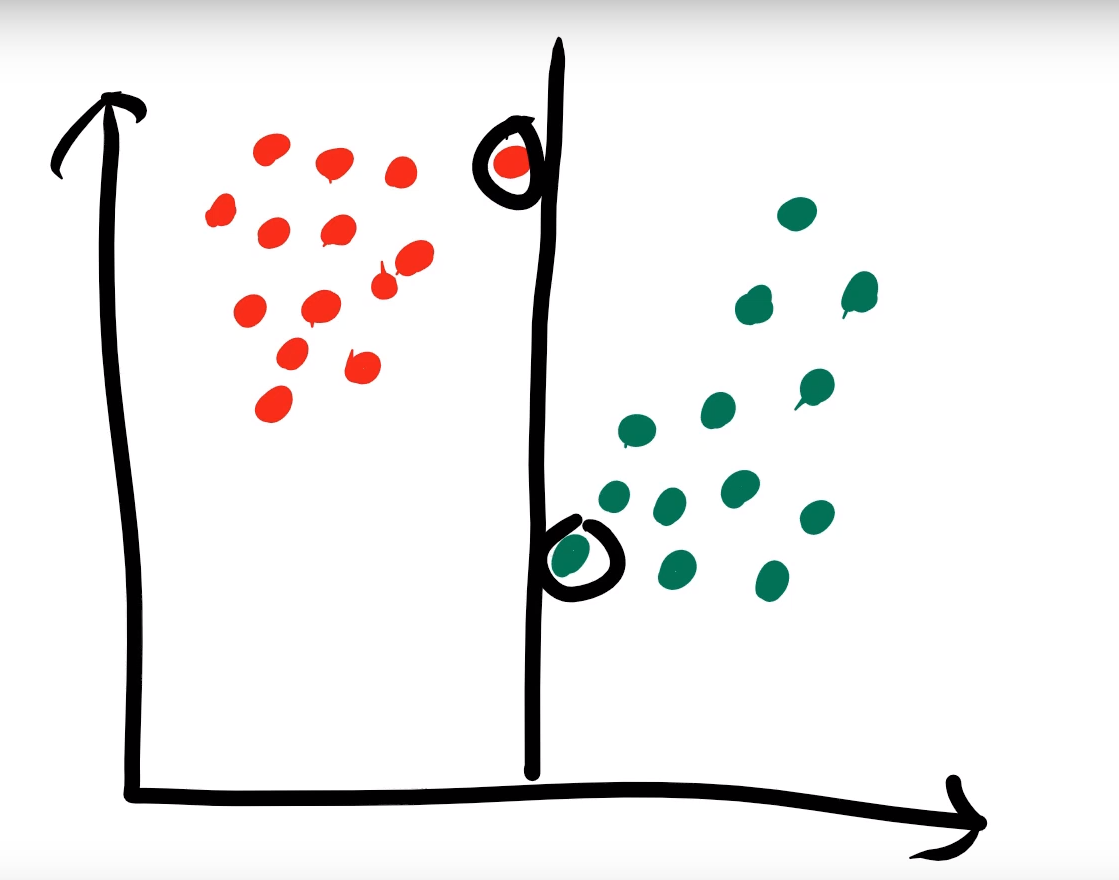

**Picking a Hyper Plane**

Once we create a hyper-plane we are going to use it to classify our data. If a test point is on the left side of the plane we would classify it as red (in our examples above) and if it is on the right we would classify it as green. So how can we pick a hyper-plane that will give us the best classification predictions?  

Have a look at the hyper-planes above and determine which you think would give the best classification for a mystery test point. What do you notice about that hyper-plane?  

Well the best possible hyper-plane would be the second image on this page. Notice the distance between the support vectors and the hyper-plane is far greater than the other generated hyper-planes.  

**When we pick a hyper-plane we want to pick one that has the greatest possible margin.**  

# Margin

The margin is the distance that separates all of the points in our test data. The blue lines below show you the margin for this particular data and hyper-plane. Typically the greater our margin the better our classification will be.

Note: Imagine the blue lines are parallel to the black

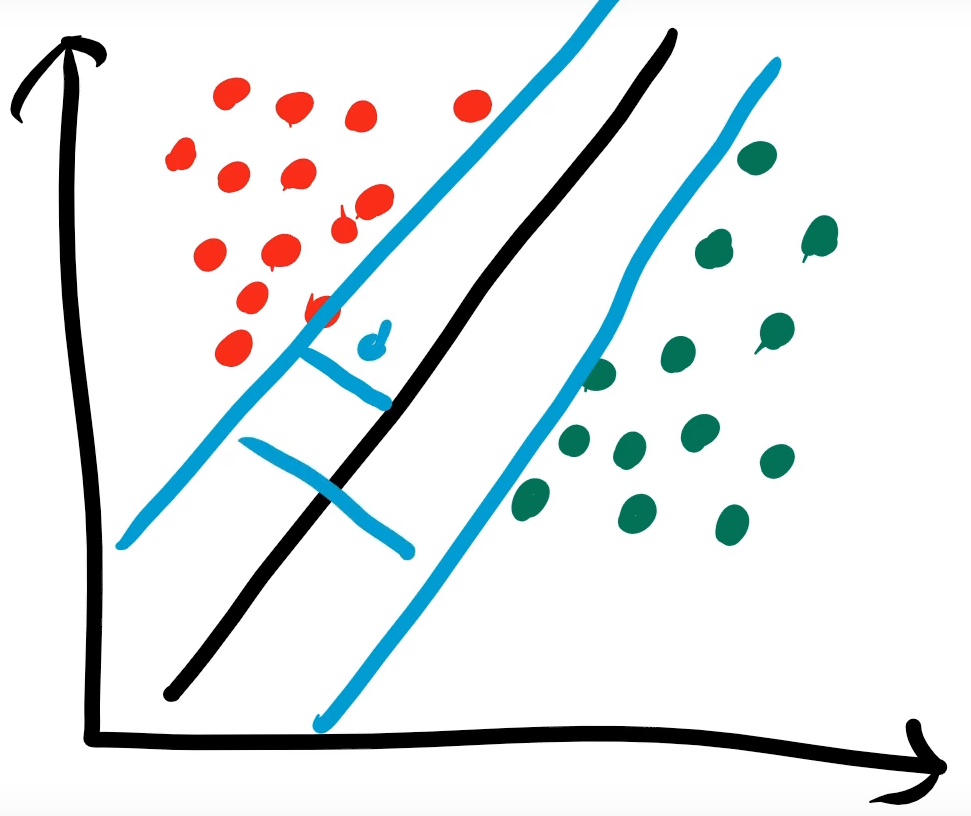

# Kernels  

Seems pretty simple in theory, but in practice we can run into a lot of issues.

Let’s say our data isn’t as pretty and we have some points that look like this:

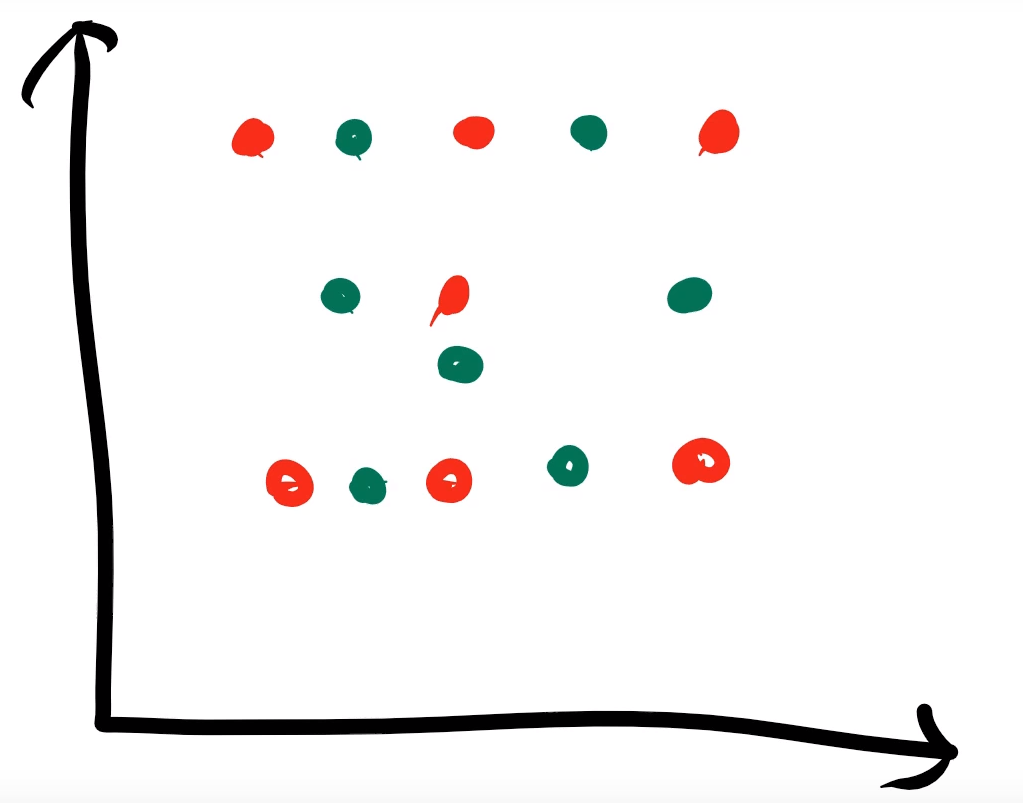

Can you determine which hyper-plane would be the best for this data? Even if you could it would make a horrible classifier. This is where we introduce something called kernels.

Kernels provide a way for us to create a hyper-plane for data like seen above. We use a kernel to bring our data up to a higher dimension (in this case from 2D=>3D ). We hope that by doing this we will have our points plotted in a way that we can divide them using a hyper-plane.

By applying a kernel to our data above we hope to get something that looks like the following:

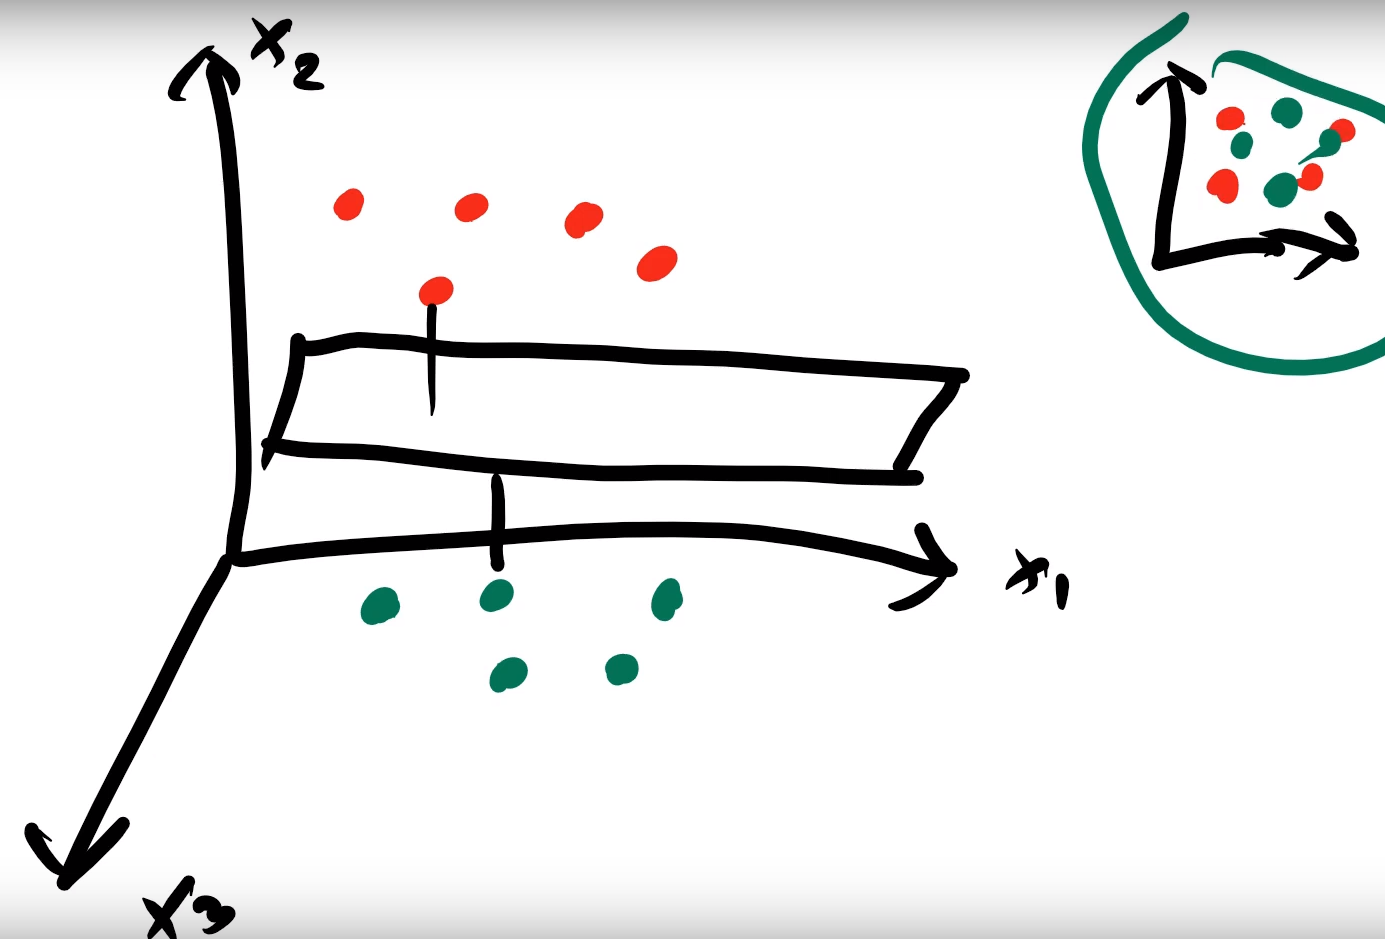

You can see that we can now divide our points with a plane in 3D. By applying the kernel our data has become separable.

**What Is A Kernel?**  

A kernel is simply a function that takes as input our features (x1, x2 in our example) and returns a value equal to the third dimensional coordinate (x3). An example of a kernel copuld be the equation:

$(x1)^2 + (x2)^2 = x3$

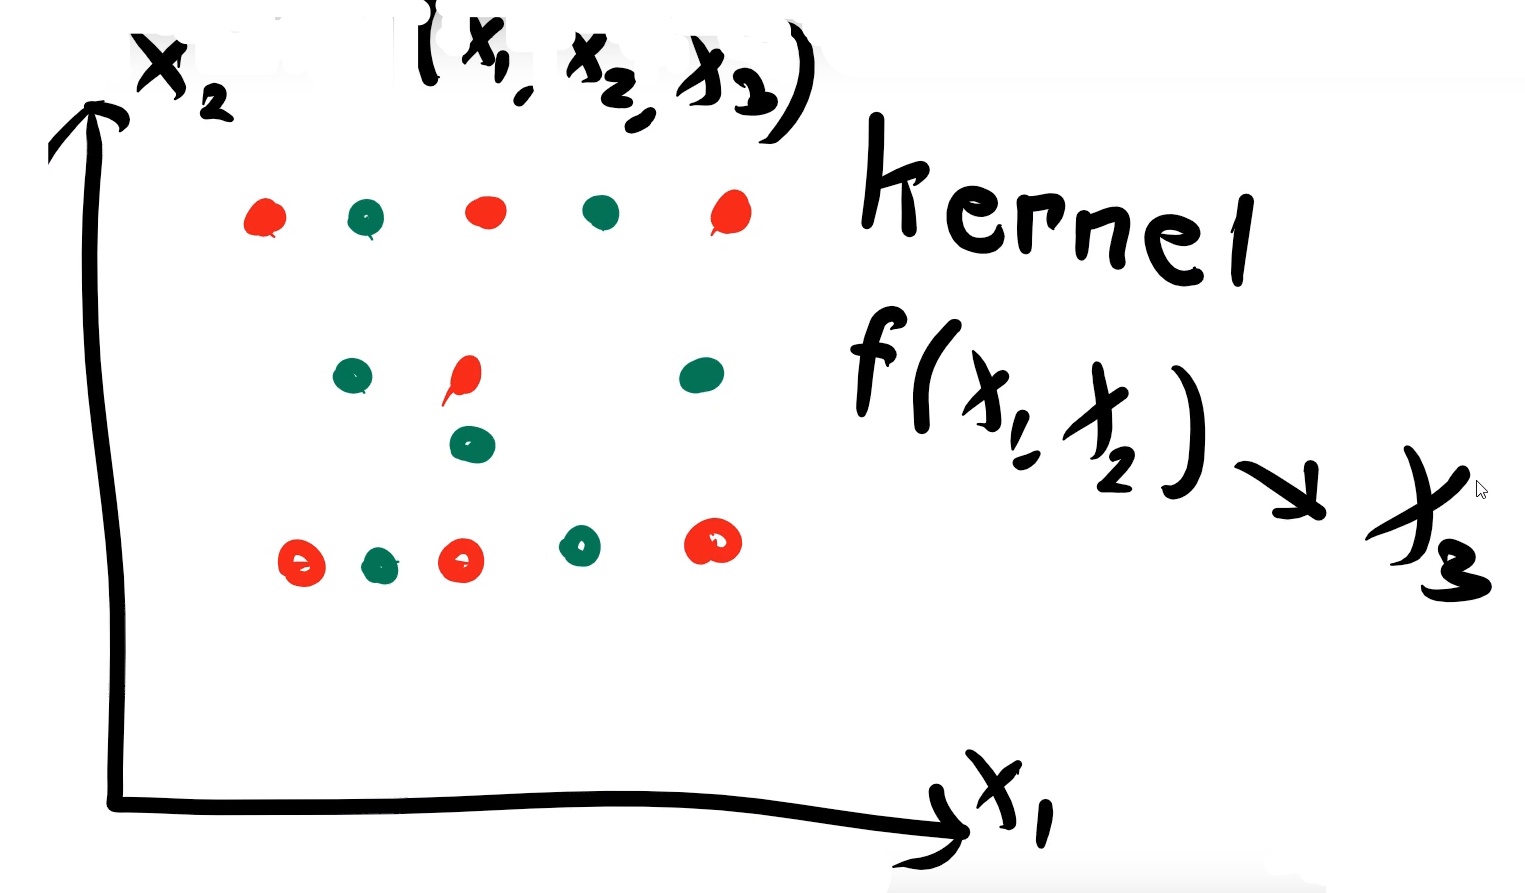

Typically when we use a kernel, we use a pre-existing one. There is much debate about which kernel is the best but here are some examples of popular kernels.  
– Linear  
– Polynomial  
– Circular  
– Hyperbolic Tangent (Sigmoid)  

**Soft & Hard Margin**  

The last topic to touch on is soft and hard margins. A hard margin is precisely what you’ve learned already, no points may exist inside the margin. However, sometimes if we have outlier points we want to allow them to exist inside the margin and use points that are not the closest to the hyper-plane to be our support vectors. Doing this is called using a soft margin. 

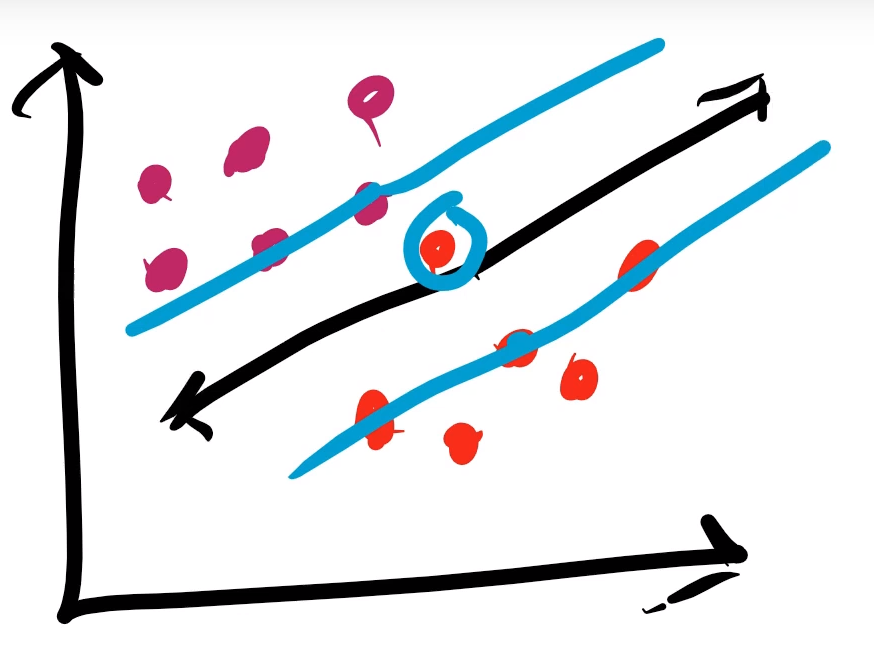

You can see in the example above that there is a point that exists inside the margin. If we had not allowed this not only would it be difficult to create a hyper-plane but our classification would perform poorly.

The amount of points you allow to exists inside the margin is something we can define as hyper-parameter.  

**Implementing a SVM**  

Implementing the SVM is actually fairly easy. We can simply create a new model and call .fit() on our training data.  

In [4]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

# To score our data we will use a useful tool from the sklearn module.
from sklearn import metrics

y_pred = clf.predict(X_test) # Predict values for our test data

acc = metrics.accuracy_score(y_test, y_pred) # Test them against our correct values
# And that is all we need to do to implement our SVM, now we can run the program and take note of our amazing accuracy!
acc

0.9385964912280702

Wait... Our accuracy is close to 85% and that is horrible! Looks like we need to add something else.

**Adding a Kernel**  

The reason we received such a low accuracy score was we forgot to add a kernel! We need to specify which kernel we should use to increase our accuracy.

Kernel Options:  
- linear  
- poly   
- rbf  
- sigmoid  
- precomputed  

We will use linear for this data-set.

In [5]:
clf = svm.SVC(kernel="linear")
#clf = svm.SVC(kernel="linear", C=1) # By default
clf.fit(X_train, y_train)
from sklearn import metrics
y_pred = clf.predict(X_test) 
acc = metrics.accuracy_score(y_test, y_pred) 
acc
# After running this we receive a much better accuracy of close to 95%

0.9473684210526315

**Changing the Margin**  

By default our kernel has a soft margin of value 1. This parameter is known as C. We can increase C to give more of a soft margin, we can also decrease it to 0 to make a hard margin. Playing with this value should alter your results slightly.

In [6]:
clf = svm.SVC(kernel="linear", C=2)
acc
# After running this we receive a much better accuracy of close to 96%

0.9473684210526315

**Comparing to KNearestNeighbors**  

If we want to see how this algorithm runs in comparison to KNN we can run the KNN classifier on this data-set and compare our accuracy values.

To change to the KNN classifier is quite simple.

In [7]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)
from sklearn import metrics
y_pred = clf.predict(X_test) 
acc = metrics.accuracy_score(y_test, y_pred) 
acc
# Simply change clf to what is above
# Note that KNN still does well on this data set but hovers around the 89% mark.

0.9298245614035088

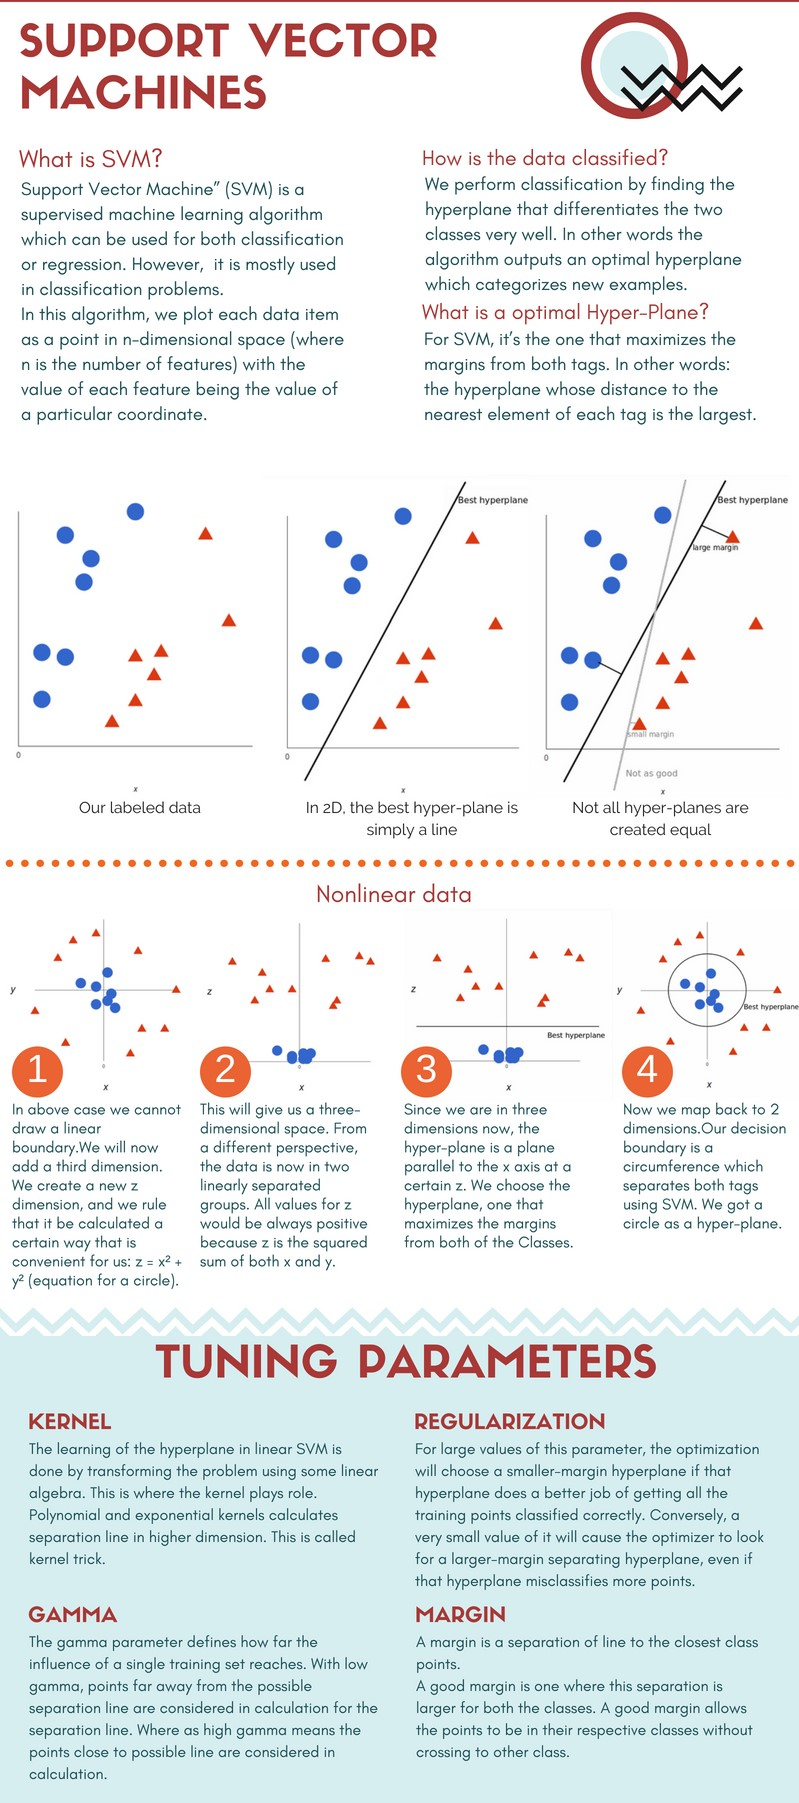

In [8]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 7, 25]], dtype=int64)

In [10]:
acc = metrics.accuracy_score(y_test, y_pred) 
acc

0.88

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


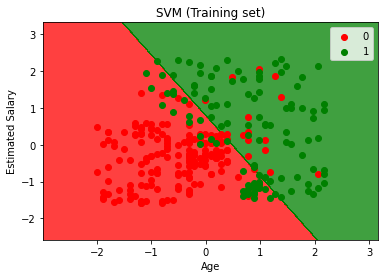

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


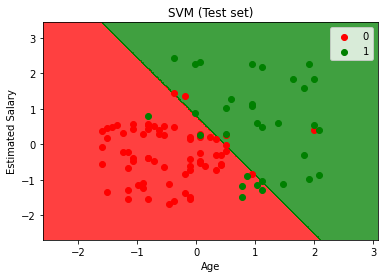

In [11]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()